### Catalog Analysis
Now we will want to create a catalog of objects that we have detected and give them labels. Here, Python can recognise the sjhapes of these objects and give us a bunch of useful data such as shape and flux. We also want to create cutouts of the image, cenetred on each source so that they can be catalogued.

In [1]:
# Importing modules
from photutils.segmentation import SourceCatalog
from astropy.io import fits
import matplotlib.pyplot as plt
from photutils.segmentation import detect_sources
from photutils.segmentation import deblend_sources
from astropy.nddata import Cutout2D


Now we must open our data as we have done in the previous notebooks to obtain our deblended source map and the significance map. Then we can use a feature of Astropy which will generate a catalog of our data and include useful information such as shape and flux.

In [2]:

threshold=2.5

data = fits.open(f"../test_data/f200w_i2d.fits")   #Opening our file 

sci = data['SCI'].data  #Defining our science map
err = data['ERR'].data  #Defining our error map

sig=sci/err
seg_image=detect_sources(sig, threshold, npixels=5)  #Creating segmentation image
deblend_map=deblend_sources(sci,seg_image,npixels=5) #Using segmentation image to create deblended image

catalog=SourceCatalog(sci,deblend_map)  # This will generate our catalog of data which will be printed below.
print(catalog)
tbl = catalog.to_table() # This just converts the catalog data into a table for ease of viewing.
print("-------------------------")
print("Detected objects data table")

print(tbl)

<photutils.segmentation.catalog.SourceCatalog>
Length: 218
labels: [  1   2   3   4   5 ... 214 215 216 217 218]
-------------------------
Detected objects data table
label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
----- ------------------ ------------------ ... ------------------ ------------
    1  668.2188152750629 29.719400788183293 ...  3.024808084598183          nan
    2  569.7169969635412  34.87219342245574 ... 1.9211905088400925          nan
    3 189.71574503686156  41.58575119931608 ...  5.138964669956576          nan
    4  574.3739233463792 48.061947820424194 ... 3.7870446311789943          nan
    5  596.1392738720245 52.424471108784786 ... 3.6615278470326573          nan
    6  606.4680396861603  63.81961551970696 ... 18.039957713007926          nan
    7 182.95661410553893  63.80353631162266 ...   4.62416942889981          nan
    8  74.23329972706063  89.0300

So here is our table containing our data. We can now plot elipses around our maps known as Kron Apeteurs. 

Text(0.5, 1.0, 'Kron Apetures on Science map')

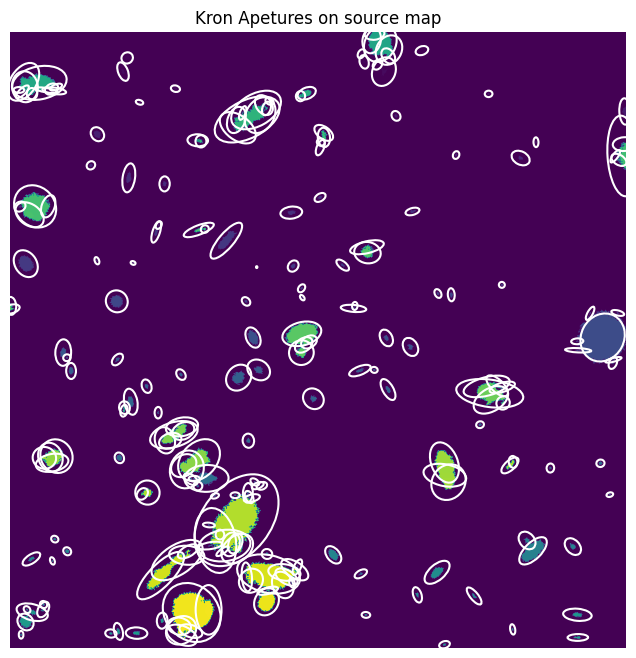

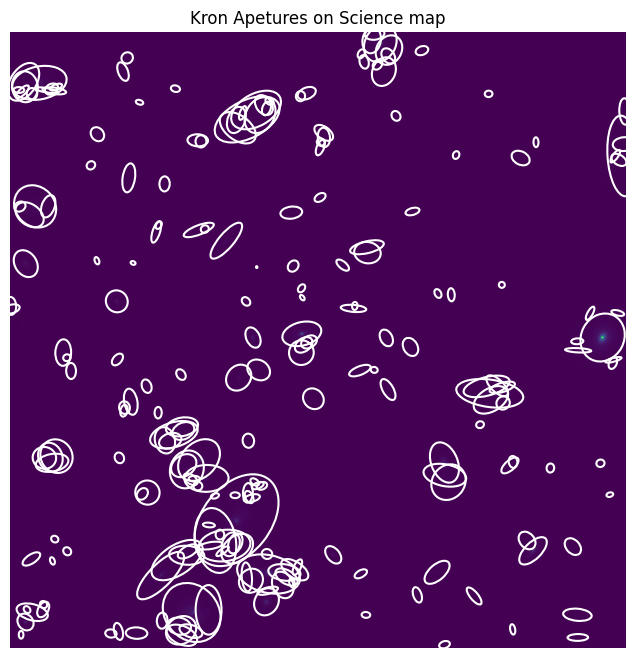

In [3]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
fig1,ax1=plt.subplots(1,1,figsize=(8,8))
ax.set_axis_off()
ax1.set_axis_off()
ax.imshow(deblend_map)
ax1.imshow(sci)
catalog.plot_kron_apertures(ax=ax, color='white', lw=1.5)
catalog.plot_kron_apertures(ax=ax1, color='white', lw=1.5)
ax.set_title("Kron Apetures on source map")
ax1.set_title("Kron Apetures on Science map")

